# Project 3

### Regression and Classification with the Ames Housing Data

>This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

#### IMPORT AND CONFIGURATION

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#load data
house = pd.read_csv('../housing.csv')

#### BASIC INSPECTION

In [4]:
#shape
print('shape of dataset : ', house.shape)
print('\n'+'='*60 + '\n')

#columns
print 'Looking through the names of the columns: \n'
print(house.columns)
print('\n'+'='*60 + '\n')

#removing non-residential units.
not_residential = ['A', 'C', 'I']
house[house['MSZoning'].isin(not_residential)]
# 'A', 'C', 'I' is already not in the dataset.

#years of houses sold in the dataset
print'Years involved in the dataset: \n '
print(house['YrSold'].unique())

('shape of dataset : ', (1460, 81))


Looking through the names of the columns: 

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'F

#### SEPERATING FIXED AND NON-FIXED FEATURES

In [39]:
# Select fixed_feature and non_fixed_features.
irrelevant_features = ['Id']

fixed_features = ['Neighborhood', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                      '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LotArea', 'MasVnrArea',
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                     'GrLivArea', 'GarageArea','BsmtFullBath', 'BsmtHalfBath',
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'SalePrice']  

non_fixed_features = ['RoofMatl', 'Exterior1st', 'MasVnrType', 'HeatingQC', 'KitchenQual', 
                      'Condition1', 'Condition2','SalePrice', 'ExterQual', 'FireplaceQu', 
                      'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
                      'OverallCond', 'BsmtCond']

#### FIXED FEATURES EDA

In [40]:
fixed = house[fixed_features]
fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
Neighborhood     1460 non-null object
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
LotArea          1460 non-null int64
MasVnrArea       1452 non-null float64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
GarageArea       1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
SalePrice        1460 non-null int64
dtypes: float64(1), int64(19), object(1)
memory usage: 239.6+ KB


Only the Neighborhood feature is an object - Neighborhood is a categorial variable thus will have to dummy this out.

Rest of the features are integers or floats.

Little nulls in the dataset.

In [57]:
fixed.describe()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,10516.828082,103.685262,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,0.425342,0.057534,443.639726,46.549315,567.240411,180921.195890
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,9981.264932,181.066207,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,0.518911,0.238753,456.098091,161.319273,441.866955,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7553.500000,0.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,223.000000,129975.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,9478.500000,0.000000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,0.000000,383.500000,0.000000,477.500000,163000.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,11601.500000,166.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,1.000000,0.000000,712.250000,0.000000,808.000000,214000.000000
max,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,215245.000000,1600.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,3.000000,2.000000,5644.000000,1474.000000,2336.000000,755000.000000


Difficult to compare features like this, very tedious on the eyes, will have to visualize

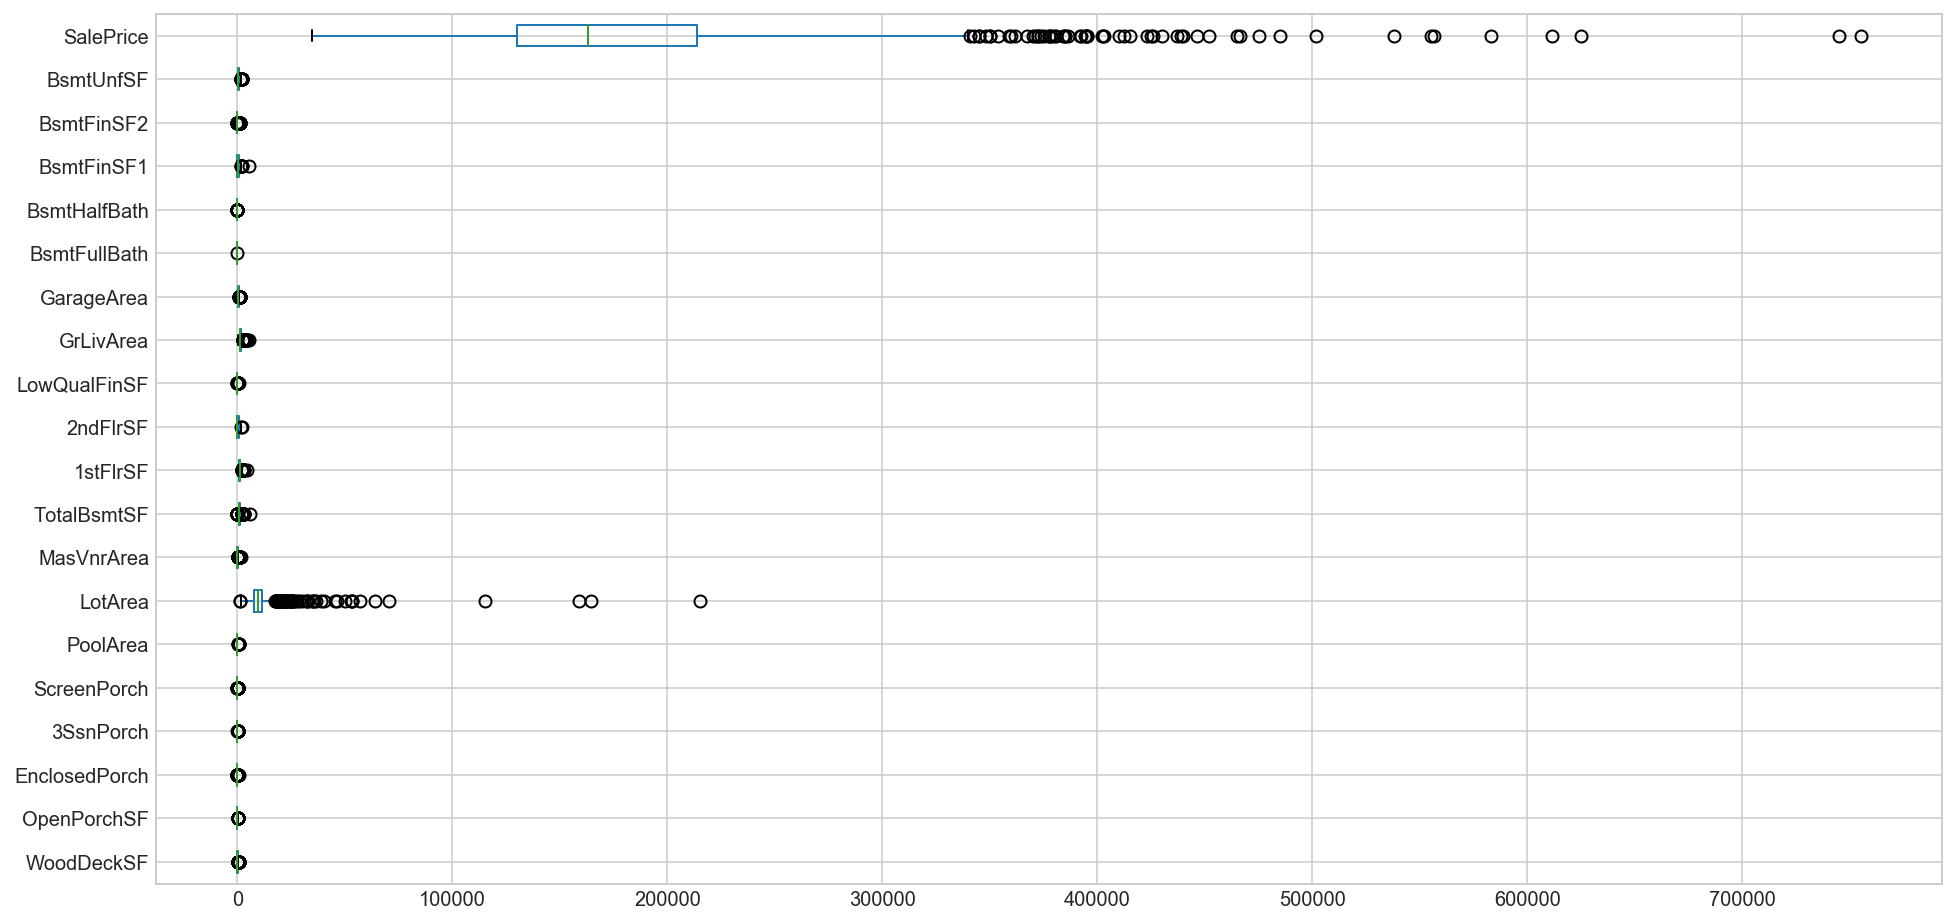

In [42]:
fixed.boxplot(figsize=(16,8), vert=False)

The range of Saleprice doesn't allow meaningful comparision between the other predictors. Remove it.

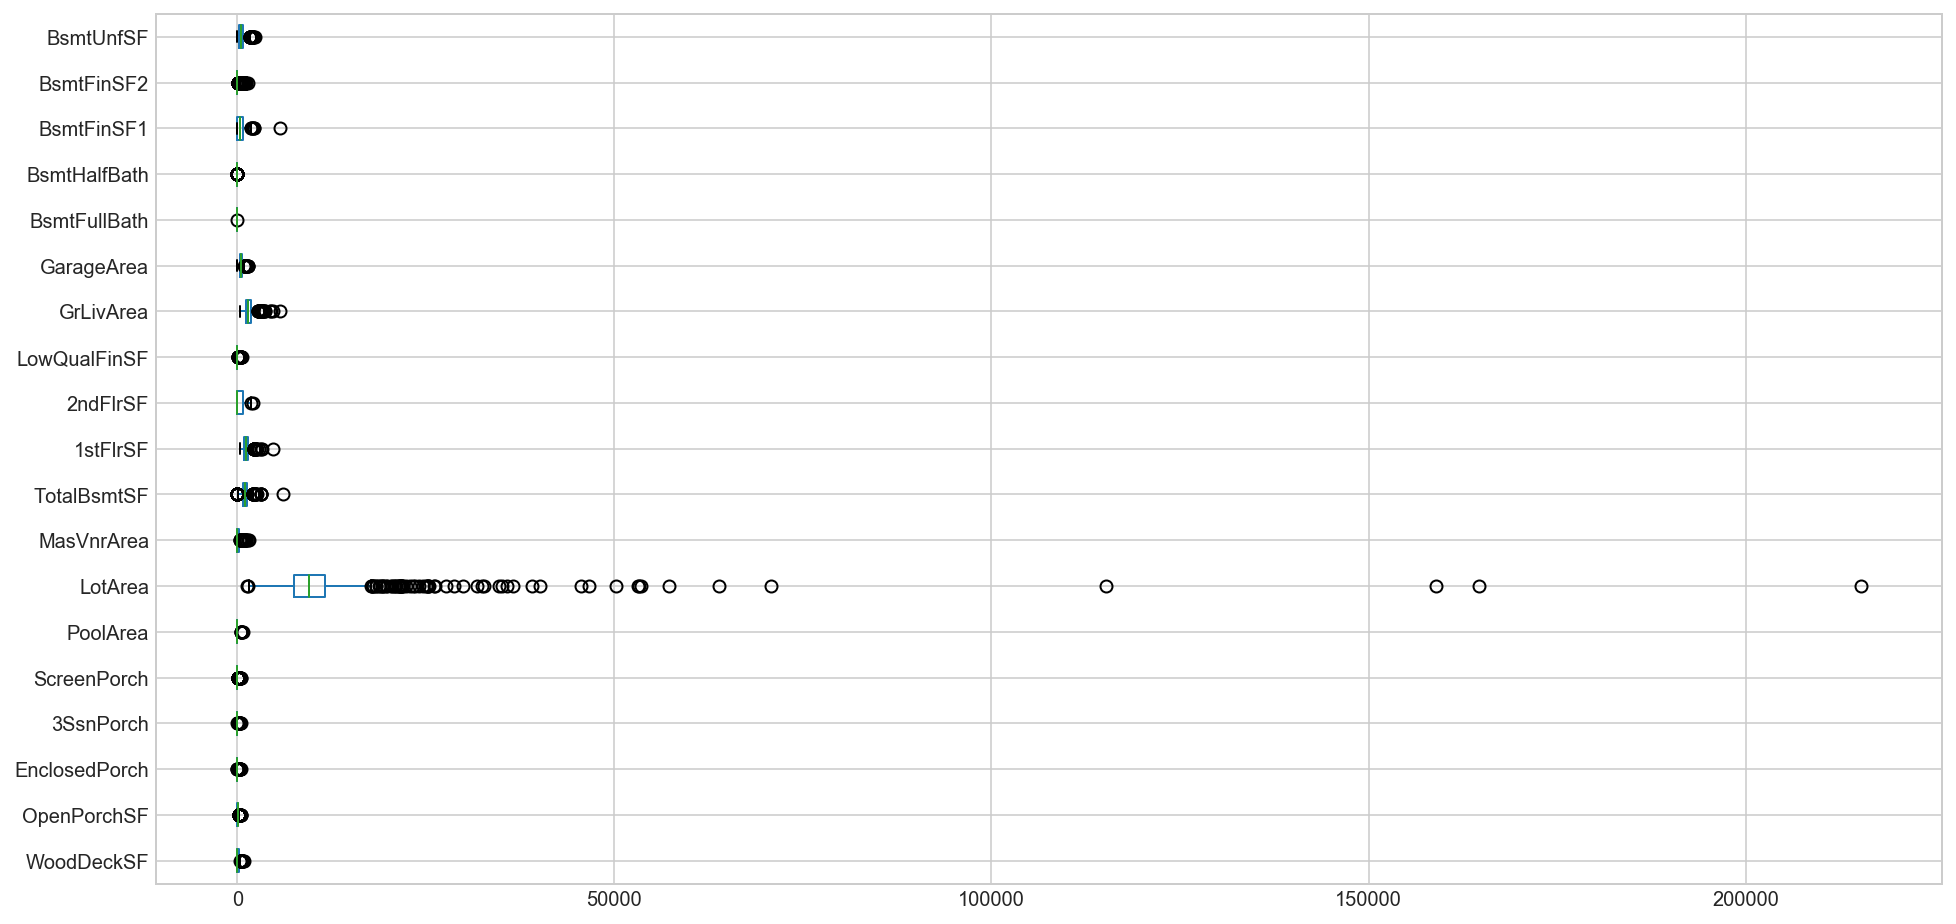

In [43]:
fixed_no_saleprice = fixed.iloc[:,:-1]
fixed_no_saleprice.boxplot(figsize=(16,8), vert=False)

Range of LotArea does not allow meaningful comparison among the other predictors. Remove it

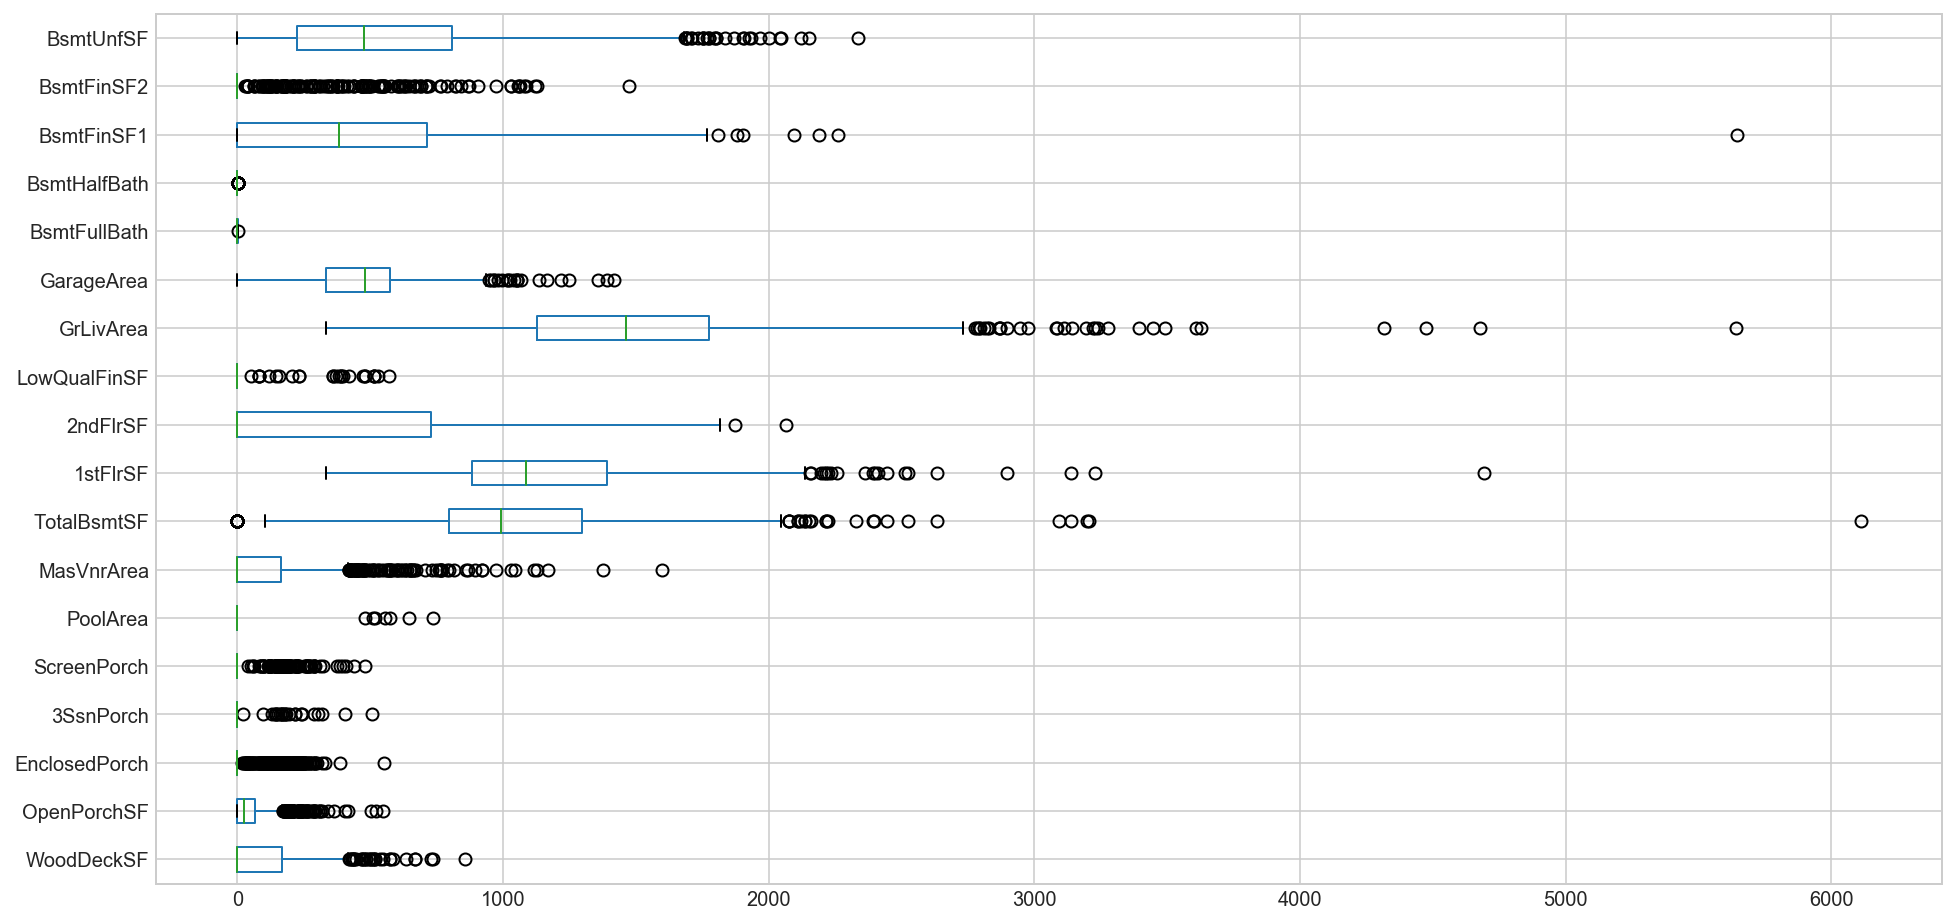

In [46]:
large_range_fixed_features = ['LotArea', 'SalePrice']
similar_range_fixed_features = [x for x in fixed_features if x not in large_range_fixed_features] #outputs a list of items from fixed_features minus the elemenents from large_range_fixed_features
similar_range_fixed_features
fixed_similar_range_features = fixed[similar_range_fixed_features]
fixed_similar_range_features.boxplot(figsize=(16,8), vert=False)

1. Median of similar ranged variables here are below 2000.
2. Min range of the all variables are 0.
3. Highest median comes from GrLivArea (most living areas are the biggest areas in a house).
4. Max range of similar variables comes from GrLivArea - closing in on the 3000 mark.
5. Multiple variables close to zero such as BsmtHalf / Full Bath, Pool Area, and Screen Porch etc.. which makes sense considering their utility.

NEXT:
1. Probably have to do some scatter plots to check on certain variables which I feel has the strongest relationship to the Salesprice.
2. I can do a heatmap too to check on the relationship of one variable to another.

## QN 1: Determine how much of fixed property characteristics is correleated to price.

---

In [49]:
#split predictors and target
fixed = house[fixed_features]
X = fixed.iloc[:,:-1]
y = fixed.iloc[:,-1]

#dummy variables
neigh_dummy = pd.get_dummies(X['Neighborhood'])
X_concat = pd.concat([X, neigh_dummy], axis=1)
X_concat.drop('Neighborhood', axis =1, inplace=True)

#remove nulls
X_concat['MasVnrArea'] = pd.to_numeric(X_concat['MasVnrArea'], errors='coerce')
X_concat['MasVnrArea'] = X_concat['MasVnrArea'].fillna(X_concat['MasVnrArea'].mean())
X_concat['MasVnrArea'].astype('float')
y = y.astype('float')

#### FEATURE SELECTION BY KBEST 

In [50]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

cols = list(X_concat.columns)

# Build the selector — we'll build one with each score type.
skb_f = SelectKBest(f_classif, k=10)
skb_chi2 = SelectKBest(chi2, k=10)

# Train the selector on the data.
skb_f.fit(X_concat, y)
skb_chi2.fit(X_concat, y)

# Examine the results.
kbest = pd.DataFrame([cols, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)
print(kbest)


bottom_5features = ['Blueste', 'Sawyer', 'SWISU', 'ClearCr', 'NWAmes']
bottom_10features = ['Blueste', 'Sawyer', 'SWISU', 'ClearCr', 'NWAmes', 'NPkVill', 'Mitchel', 'EnclosedPorch',
                    'Edwards', 'BsmtHalfBath']

X_drop5 = X_concat.drop(bottom_5features, axis=1)
X_drop10 = X_concat.drop(bottom_10features, axis=1)
print (X_concat.shape)
print (X_drop10.shape)
print (X_drop5.shape)

          feature f_classif  chi2 score
36        NridgHt   4.48329     1090.23
12      GrLivArea   3.43511      196850
35        NoRidge   3.43219     1050.51
6         LotArea   3.28585  1.0115e+07
44        Veenker   2.69042     1001.05
13     GarageArea   2.58334     96184.1
9        1stFlrSF   2.33862      123810
8     TotalBsmtSF   2.31529      174706
19    TotalBsmtSF   2.31529      174706
41        Somerst   2.11225     875.173
7      MasVnrArea   1.98779      285740
20        Blmngtn   1.93749     889.979
42        StoneBr   1.86961       872.9
16     BsmtFinSF1   1.69472      399985
43         Timber   1.67753     827.861
10       2ndFlrSF   1.66399      464884
18      BsmtUnfSF   1.45435      274751
25        CollgCr   1.43472     712.289
26        Crawfor   1.43193      765.44
1     OpenPorchSF   1.42328     74362.6
0      WoodDeckSF   1.37877      129834
29         IDOTRR   1.29042     736.172
14   BsmtFullBath   1.13557     448.324
28        Gilbert   1.10558     661.097


#### FEATURE SELECTION BY RFE(RECURSIVE FEATURE ELEMINATION)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

lr = LinearRegression()
selector = RFECV(lr, step=1, cv=10)
selector = selector.fit(X_concat, y)

print (selector.support_)
print('='*20)
print (selector.ranking_)

print('='*20)
print ('total number of predictors : {}'.format(len(selector.ranking_)))

pd.DataFrame([X_concat.columns, selector.support_, selector.ranking_], index=['Predictors', 'Recursive Feature Elimination Answer', 'Ranking']).T

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]
total number of predictors : 45


,Predictors,Recursive Feature Elimination Answer,Ranking
0,WoodDeckSF,True,1
1,OpenPorchSF,True,1
2,EnclosedPorch,True,1
3,3SsnPorch,True,1
4,ScreenPorch,True,1
5,PoolArea,True,1
6,LotArea,True,1
7,MasVnrArea,True,1
8,TotalBsmtSF,True,1
9,1stFlrSF,True,1


#### LINEAR MODEL

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

#train-test set up
X_train45, X_test45, y_train45, y_test45 = train_test_split(X_concat, y, train_size=0.7, random_state=88)
X_train45.shape, y_train45.shape
X_test45.shape, y_test45.shape

#w/o cross validation
model45 = LinearRegression()
model45.fit(X_train45, y_train45)
model45.score(X_test45, y_test45)

# With cross validataion
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_concat, y, cv=10)
print (lr_scores)
print ('='*20)
print ('mean of cross_val_scores {}'.format(np.mean(lr_scores)))

[0.85267508 0.81715762 0.85584122 0.75818831 0.79318915 0.83000955
 0.77493096 0.77493694 0.48589756 0.82256481]
mean of cross_val_scores 0.776539119026


#### RIDGE MODEL

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV

ss = StandardScaler()
Xs = ss.fit_transform(X_concat)

#attaining optimal alpha
range_alpha = np.logspace(2,3,50)
RCV = RidgeCV(alphas=range_alpha, cv=10)
RCV.fit(Xs,y)
optimal_ridge_alpha = RCV.alpha_
optimal_ridge_alpha

#scoring the optimal alpha
ridge = Ridge(alpha=optimal_ridge_alpha,)
ridge_score = cross_val_score(ridge, Xs, y, cv=10)
print (ridge_score)
print ('='*20)
print ('mean of ridge_score: ', np.mean(ridge_score))

[0.85514887 0.82168854 0.85670836 0.75814673 0.79268222 0.83209676
 0.77371915 0.78225637 0.4857345  0.82757763]
('mean of ridge_score: ', 0.778575914261703)


#### LASSO MODEL

In [54]:
from sklearn.linear_model import Lasso, LassoCV

#attaining optimal lasso alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(Xs, y)
optimal_lasso_alpha =  optimal_lasso.alpha_
print ('optimal_lasso_alpha', optimal_lasso_alpha)
print ('='*20)

#scoring optimal lasso alpha
lasso = Lasso(alpha=optimal_lasso_alpha)
lasso_score = cross_val_score(lasso, Xs, y, cv=10)
print (lasso_score)
print ('\n mean of lasso_score: ', np.mean(lasso_score))

#checking which features were zeroed out
lasso.fit(Xs,y)
lasso_coef = pd.DataFrame({'Features': X_concat.columns,
                          'Coef': lasso.coef_})
lasso_coef = lasso_coef[['Features', 'Coef']]
print ('='*20, '\n')
print (lasso_coef[lasso_coef['Coef'] == 0])
print ("\n 5 features got zeroed out by lasso")
print ('\n number of predictor features used in total: ', len(lasso_coef))
print ('\n percentage of features zeroed out: 5 / 45 = ', round(5/float(45),2))

('optimal_lasso_alpha', 152.4705678544128)
[0.85337597 0.81919197 0.85739251 0.75793668 0.79269722 0.83135543
 0.77514095 0.77496517 0.48317322 0.82319669]
('\n mean of lasso_score: ', 0.7768425811609785)
('====================', '\n')
     Features  Coef
10   2ndFlrSF   0.0
18  BsmtUnfSF   0.0
21    Blueste  -0.0
33    NPkVill   0.0
34     NWAmes  -0.0

 5 features got zeroed out by lasso
('\n number of predictor features used in total: ', 45)
('\n percentage of features zeroed out: 5 / 45 = ', 0.11)


#### ELASTIC NET MODEL

In [55]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

#finding the optimal l1 ratio
range_l1_ratios = np.linspace(0.01, 1, 25)
optimal_hyper_param = ElasticNetCV(l1_ratio=range_l1_ratios, n_alphas=30, cv=10)
optimal_hyper_param.fit(Xs,y)
print ('alpha: ', optimal_hyper_param.alpha_)
print ('l1_ratio: ', optimal_hyper_param.l1_ratio_)
print ('='*20)


#scoring the elastic net
enet = ElasticNet(alpha=optimal_hyper_param.alpha_, l1_ratio=optimal_hyper_param.l1_ratio_)
enet_scores = cross_val_score(enet, Xs, y, cv=10)
print (enet_scores)
print ('='*20)
print ('\nSince the l1_ratio is 1.0 then the ElasticNet will perform just like the Lasso Regression  \n')
print ('mean of LinearReg_scores: ', np.mean(lr_scores))
print ('mean of enet_scores: ' , np.mean(enet_scores))
print ('mean of ridge_score: ', np.mean(ridge_score))
print ('mean of lasso_score: ', np.mean(lasso_score))

('alpha: ', 185.1661793602367)
('l1_ratio: ', 1.0)
[0.85344984 0.81961169 0.85767914 0.75783499 0.79257631 0.8315766
 0.77515122 0.77494128 0.48257558 0.82331534]

Since the l1_ratio is 1.0 then the ElasticNet will perform just like the Lasso Regression  

('mean of LinearReg_scores: ', 0.7765391190263479)
('mean of enet_scores: ', 0.7768711988210377)
('mean of ridge_score: ', 0.778575914261703)
('mean of lasso_score: ', 0.7768425811609785)


## QN 2: Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

#### SETTING UP

In [75]:
'''The unexplained correlation(residuals) between the 
fixed features and the price will be used as the target here.
- The hypothesis is that the unfixed features may explain the residuals''' 

#residuls from the linear model
y_predict45 = model45.predict(X_test45)
linear_residuals = y_test45 - y_predict45
non_fixed_linear_y = linear_residuals

#residuls from the ridge model 
ridge = Ridge()
ridge.fit(X_concat, y)
y_ridge_predict = ridge.predict(X_test45)
ridge_residuals = y_test45 - y_ridge_predict
non_fixed_ridge_y = ridge_residuals

#residuls from the lasso model 
lasso = Lasso(alpha=optimal_lasso_alpha)
lasso.fit(X_concat,y)
y_lasso_predict = lasso.predict(X_test45)
lasso_residuals = y_test45 - y_lasso_predict
non_fixed_lasso_y = lasso_residuals

#creating the non-fixed features dataframe
non_fixed_X = house[non_fixed_features].copy().drop('SalePrice', axis=1)
non_fixed_X  = pd.get_dummies(non_fixed_X)

#selecting the index that corresponds to X_test from question 1
non_fixed_X = X = non_fixed_X.iloc[X_test45.index]

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


#### RESIDUALS FROM THE LINEAR MODEL

In [73]:
'''Linear'''

lr = LinearRegression()
lr_score = cross_val_score(lr, non_fixed_X,  non_fixed_linear_y, cv=10)
print'LINEAR MODEL'
print 'mean of linear scores : ', np.mean(lr_score)
print '='*40
print('\n')

'''Ridge'''

#finding the best alpha(hyper-parameter) for ridge
optimal_alphas = np.logspace(-2,7,50)
RCV = RidgeCV(alphas=optimal_alphas, cv=10)
RCV.fit(non_fixed_X, non_fixed_linear_y)

#using the optimal alpha to test
ridge=Ridge(alpha=RCV.alpha_)
ridge_score = cross_val_score(ridge, non_fixed_X, non_fixed_linear_y, cv=10)

print'RIDGE MODEL'
print ridge_score
print 'mean of ridge scores: ', np.mean(ridge_score)
print '='*40
print('\n')

'''Lasso'''

#finding the best alpha(hyper-parameter) for lasso
LCV = LassoCV(n_alphas=500, cv=10)
LCV.fit(non_fixed_X, non_fixed_linear_y)
LCV.alpha_

#using the optimal alpha to test
lasso = Lasso(alpha=LCV.alpha_)
lasso_score = cross_val_score(lasso, non_fixed_X, non_fixed_linear_y, cv=10)

print'LASSO MODEL'
print lasso_score
print 'mean of lasso_score: ', np.mean(lasso_score)
print '='*40
print('\n')

'''Elastic Net Model'''
l1_ratios = np.linspace(0.01,1.0,25)
ECV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=50, cv=10)
ECV.fit(non_fixed_X, non_fixed_linear_y)

print'ELASTIC NET MODEL'
print 'ECV ratio :', ECV.l1_ratio_
print 'Did not need to execute ENET as l1_ratio of 1 is simply a lasso regularization penalty and has already been executed in the prior step'
print '='*40
print('\n')

LINEAR MODEL
mean of linear scores :  -4.169835641267372e+23


RIDGE MODEL
[-0.1213242  -0.01875507  0.04888546  0.08202169 -0.05697737  0.15789197
  0.31222055  0.09053512  0.18502632  0.1721814 ]
mean of ridge scores:  0.0851705874388885


LASSO MODEL
[-0.12444874  0.04925458  0.07275198  0.0745331  -0.07201356  0.29955781
  0.37275292  0.13936973  0.10842363  0.12867536]
mean of lasso_score:  0.1048856816098527


ELASTIC NET MODEL
ECV ratio : 1.0
Did not need to execute ENET as l1_ratio of 1 is simply a lasso regularization penalty and has already been executed in the prior step




#### RESIDUALS FROM THE RIDGE MODEL

In [74]:
'''Linear'''

lr = LinearRegression()
lr_score = cross_val_score(lr, non_fixed_X,  non_fixed_ridge_y, cv=10)
print'LINEAR MODEL'
print 'mean of linear scores : ', np.mean(lr_score)
print '='*40
print('\n')

'''Ridge'''

#finding the best alpha(hyper-parameter) for ridge
optimal_alphas = np.logspace(-2,7,50)
RCV = RidgeCV(alphas=optimal_alphas, cv=10)
RCV.fit(non_fixed_X, non_fixed_ridge_y)

#using the optimal alpha to test
ridge=Ridge(alpha=RCV.alpha_)
ridge_score = cross_val_score(ridge, non_fixed_X, non_fixed_ridge_y, cv=10)

print'RIDGE MODEL'
print ridge_score
print 'mean of ridge scores: ', np.mean(ridge_score)
print '='*40
print('\n')

'''Lasso'''

#finding the best alpha(hyper-parameter) for lasso
LCV = LassoCV(n_alphas=500, cv=10)
LCV.fit(non_fixed_X, non_fixed_ridge_y)
LCV.alpha_

#using the optimal alpha to test
lasso = Lasso(alpha=LCV.alpha_)
lasso_score = cross_val_score(lasso, non_fixed_X, non_fixed_ridge_y, cv=10)

print'LASSO MODEL'
print lasso_score
print 'mean of lasso_score: ', np.mean(lasso_score)
print '='*40
print('\n')

'''Elastic Net Model'''
l1_ratios = np.linspace(0.01,1.0,25)
ECV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=50, cv=10)
ECV.fit(non_fixed_X, non_fixed_ridge_y)

print'ELASTIC NET MODEL'
print 'ECV ratio :', ECV.l1_ratio_
print 'Did not need to execute ENET as l1_ratio of 1 is simply a lasso regularization penalty and has already been executed in the prior step'
print '='*40
print('\n')

LINEAR MODEL
mean of linear scores :  -1.977143952001652e+23


RIDGE MODEL
[-0.04368645  0.07709577  0.09446459  0.10072111 -0.06461339  0.18757541
  0.333408    0.11188224  0.20751027  0.20188103]
mean of ridge scores:  0.12062385755719243


LASSO MODEL
[-0.07514282  0.09260773  0.11170429  0.14963447 -0.09801394  0.31153164
  0.41680865  0.16127872  0.14211478  0.1903568 ]
mean of lasso_score:  0.14028803251652375


ELASTIC NET MODEL
ECV ratio : 1.0
Did not need to execute ENET as l1_ratio of 1 is simply a lasso regularization penalty and has already been executed in the prior step




#### RESIDUALS FROM THE LASSO MODEL

In [76]:
'''Linear'''

lr = LinearRegression()
lr_score = cross_val_score(lr, non_fixed_X,  non_fixed_lasso_y, cv=10)
print'LINEAR MODEL'
print 'mean of linear scores : ', np.mean(lr_score)
print '='*40
print('\n')

'''Ridge'''

#finding the best alpha(hyper-parameter) for ridge
optimal_alphas = np.logspace(-2,7,50)
RCV = RidgeCV(alphas=optimal_alphas, cv=10)
RCV.fit(non_fixed_X, non_fixed_lasso_y)

#using the optimal alpha to test
ridge=Ridge(alpha=RCV.alpha_)
ridge_score = cross_val_score(ridge, non_fixed_X, non_fixed_lasso_y, cv=10)

print'RIDGE MODEL'
print ridge_score
print 'mean of ridge scores: ', np.mean(ridge_score)
print '='*40
print('\n')

'''Lasso'''

#finding the best alpha(hyper-parameter) for lasso
LCV = LassoCV(n_alphas=500, cv=10)
LCV.fit(non_fixed_X, non_fixed_lasso_y)
LCV.alpha_

#using the optimal alpha to test
lasso = Lasso(alpha=LCV.alpha_)
lasso_score = cross_val_score(lasso, non_fixed_X, non_fixed_lasso_y, cv=10)

print'LASSO MODEL'
print lasso_score
print 'mean of lasso_score: ', np.mean(lasso_score)
print '='*40
print('\n')

'''Elastic Net Model'''
l1_ratios = np.linspace(0.01,1.0,25)
ECV = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=50, cv=10)
ECV.fit(non_fixed_X, non_fixed_lasso_y)

print'ELASTIC NET MODEL'
print 'ECV ratio :', ECV.l1_ratio_
print 'Did not need to execute ENET as l1_ratio of 1 is simply a lasso regularization penalty and has already been executed in the prior step'
print '='*40
print('\n')

LINEAR MODEL
mean of linear scores :  -2.5963625567933125e+23


RIDGE MODEL
[-0.04301077  0.05709353  0.13455007  0.14317161 -0.06901181  0.16967734
  0.31954711  0.1168907   0.193354    0.26481726]
mean of ridge scores:  0.12870790300377838


LASSO MODEL
[-0.07142509  0.09054579  0.17323258  0.2068595  -0.10358438  0.30494687
  0.39069113  0.17072905  0.13543134  0.25682305]
mean of lasso_score:  0.1554249836422926


ELASTIC NET MODEL
ECV ratio : 1.0
Did not need to execute ENET as l1_ratio of 1 is simply a lasso regularization penalty and has already been executed in the prior step




## CONCLUSION

#### CONCLUSION

1. Since fixed features can only explain about 77% of the sale price, then only 10% of the of the remaining 23% unexplained which is 2.3% can be explained by non_fixed_features.
2. So the remaing 20.7% of the sale price cannot be explained by the fixed and unfixed features.

#### OTHERS

When R2<0, a horizontal line explains the data better than your model. (Remember that a horizontal line is the baseline for linear regression).

When R2=0, a horizontal line explains the data equally as well as your model. 

Thus for your scores that were below 0 as in the case of your linear models from both the linear and ridge residuals, using the baseline to predict against those models would do a better job.

## 3. What property characteristics predict an "abnormal" sale?

---

#### SETTING UP THE PREDICTORS AND THE TARGET

In [68]:
#drop 2 not needed columns
df = house
X = df.drop(columns=['Id','SalePrice', 'SaleCondition'], axis=1)

#removing columns that have more than 80% null. 
print X.shape
X = X[X.columns[X.isnull().sum() < 0.8]]
print X.shape
print 'Dropped 19 columns that had more than 80% Nans in their columns'

#creating a binary class for SaleCondition
y = df[['SaleCondition']].copy()
y['SaleCondition'] = y['SaleCondition'].apply(lambda x: 1 if x == 'Abnorml' else 0)

(1460, 78)
(1460, 59)
Dropped 19 columns that had more than 80% Nans in their columns


#### APPENDING DUMMY VARIABLES

In [69]:
#the categorical features that I will need to dummy out (37 in total)
req_dummy = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle'
            ,'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
            'HeatingQC', 'CentralAir', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
            'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive',
            'SaleType']


#drop the categorical columns and append its dummied version
dummy_cols =  pd.get_dummies(X[req_dummy])
X.drop(columns=req_dummy, axis=1, inplace=True)
X = pd.concat([X, dummy_cols], axis=1)

#### FEATURE SELECTION USING KBEST

In [112]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

skb_f = SelectKBest(f_classif, k=50)
skb_chi2 = SelectKBest(chi2, k=50)

# Train the selector on the data.
skb_f.fit(X, y)
skb_chi2.fit(X, y)

# Examine the results.
kbest = pd.DataFrame([X.columns, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('f_classif', ascending=False)

In [113]:
#5 strongest features
kbest.head()

,feature,f_classif,chi2 score
200,SaleType_COD,185.134,159.655
207,SaleType_Oth,41.5451,40.3663
33,MSZoning_C (all),29.5713,28.8244
208,SaleType_WD,29.423,3.81777
3,YearRemodAdd,27.4516,5.79003


In [114]:
#5 weakest features
kbest.tail()

,feature,f_classif,chi2 score
133,Exterior1st_HdBoard,0.0105314,0.00894226
77,Neighborhood_Sawyer,0.0031356,0.00298075
78,Neighborhood_SawyerW,0.00181979,0.00174864
194,Functional_Mod,0.00148246,0.00146924
186,KitchenQual_Ex,0.00112471,0.00104911


#### FEATURE SELECTION USING RECURSIVE FEATURE SELECTION

In [89]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
selector = RFECV(lr, step=2, cv=10)
selector = selector.fit(X, y)

print selector.ranking_
print ('\n' + '='*60 + '\n')

#check for those ranked 2
RFS_df = pd.DataFrame([X.columns, selector.support_, selector.ranking_], index=['col_name', 'support', 'ranking']).T
RFS_df[RFS_df['ranking'] > 1]

print ('Apparently according to Recursive Feature Elimination, LotArea and Condition2_RRAe \
are two features that are not good predictors of abnormal sales')

[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Apparently according to Recursive Feature Elimination, LotArea and Condition2_RRAe are two features that are not good predictors of abnormal sales


#### FEATURE SELECTION USING LASSO PENALTY

In [99]:
#scale the features - to remove an imbalanced effect from featuers with a larger range.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

#fit the scaled predictors and the target
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(penalty='l1', Cs=10, cv=3, solver='liblinear')
lrcv.fit(Xs, y)

#get the coefficients and put into a data frame
lrcv_coef = pd.DataFrame(lrcv.coef_)
lrcv_coef = lrcv_coef.T
lrcv_coef['col_name'] = X.columns
lrcv_coef.rename({0:'coef'}, axis=1, inplace=True)
lrcv_coef = lrcv_coef[['col_name', 'coef']]

#check how many features got zeroed out by lasso
print len(lrcv_coef),  ' columns in total'
print len(lrcv_coef[lrcv_coef['coef'] == 0]), ' columns which had their  coefficient zeroed out'
print ('\n' + '='*60 + '\n')

209  columns in total
101  columns which had their  coefficient zeroed out




In [117]:
#zerod features
lrcv_coef[lrcv_coef['coef'] == 0]

,col_name,coef
0,MSSubClass,0.0
4,BsmtFinSF1,0.0
6,BsmtUnfSF,0.0
8,1stFlrSF,0.0
9,2ndFlrSF,0.0
11,GrLivArea,0.0
13,WoodDeckSF,0.0
15,EnclosedPorch,0.0
20,MoSold,0.0
22,OverallQual,0.0


In [97]:
#non-zerod most positively correlated features
lrcv_coef[lrcv_coef['coef'] != 0].sort_values('coef', ascending=False)[:5]

,col_name,coef
200,SaleType_COD,0.506167
186,KitchenQual_Ex,0.271895
207,SaleType_Oth,0.269582
139,Exterior1st_VinylSd,0.241314
157,Exterior2nd_Wd Shng,0.219687


In [98]:
#non-zerod most negatively correlated features
lrcv_coef[lrcv_coef['coef'] != 0].sort_values('coef')[:5]

,col_name,coef
206,SaleType_New,-0.435063
3,YearRemodAdd,-0.321782
74,Neighborhood_NridgHt,-0.312862
12,GarageArea,-0.279556
106,HouseStyle_1.5Unf,-0.268691
